<h1><center>–ü–æ–∏—Å–∫ –∞–Ω–æ–º–∞–ª–∏–π –≤ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏—è—Ö</center></h1>

**–ü–æ–¥–∫–ª—é—á–µ–Ω–∏–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫ –∏ –∑–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö**

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from umap import UMAP
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from tqdm import tqdm
from time import time

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

pd.set_option("display.max_columns", None)

In [2]:
data = pd.read_csv("data/creditcard.csv")
data.shape

(284807, 31)

<h2>EDA</h2>

–î–∞–Ω–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç –∏–∑ —Å–µ–±—è –ø–µ—Ä–≤—ã–µ 28 –≥–ª–∞–≤–Ω—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç, –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –ø–æ—Å–ª–µ PCA –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

–ü—Ä–æ–ø—É—Å–∫–æ–≤ –Ω–µ—Ç, –≤—Å–µ –¥–∞–Ω–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –≤ —á–∏—Å–ª–æ–≤–æ–π —à–∫–∞–ª–µ.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –æ—Å–Ω–æ–≤–Ω—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö (–±–µ–∑ —Å—Ç–æ–ª–±—Ü–∞ —Å —ç–∫—Å–ø–µ—Ä—Ç–Ω–æ–π –æ—Ü–µ–Ω–∫–æ–π)

In [4]:
features = data.drop(columns="Class")
features.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.772925e-15  9.289524e-16 -1.803266e-15  1.674888e-15  1.475621e-15   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   3.501098e-15  1.392460e-15 -7.466538e-16  4.258754e-16  9.019919e-16   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   5.126845e-16  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000  
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619  
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109  
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000  
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.2

**–ü–æ—Å—Ç—Ä–æ–∏–º —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–∏–µ –æ—Ü–µ–Ω–∫–∏ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤ —Ä–∞–∑—Ä–µ–∑–µ –∞—Ç—Ä–∏–±—É—Ç–∞** ***Class***

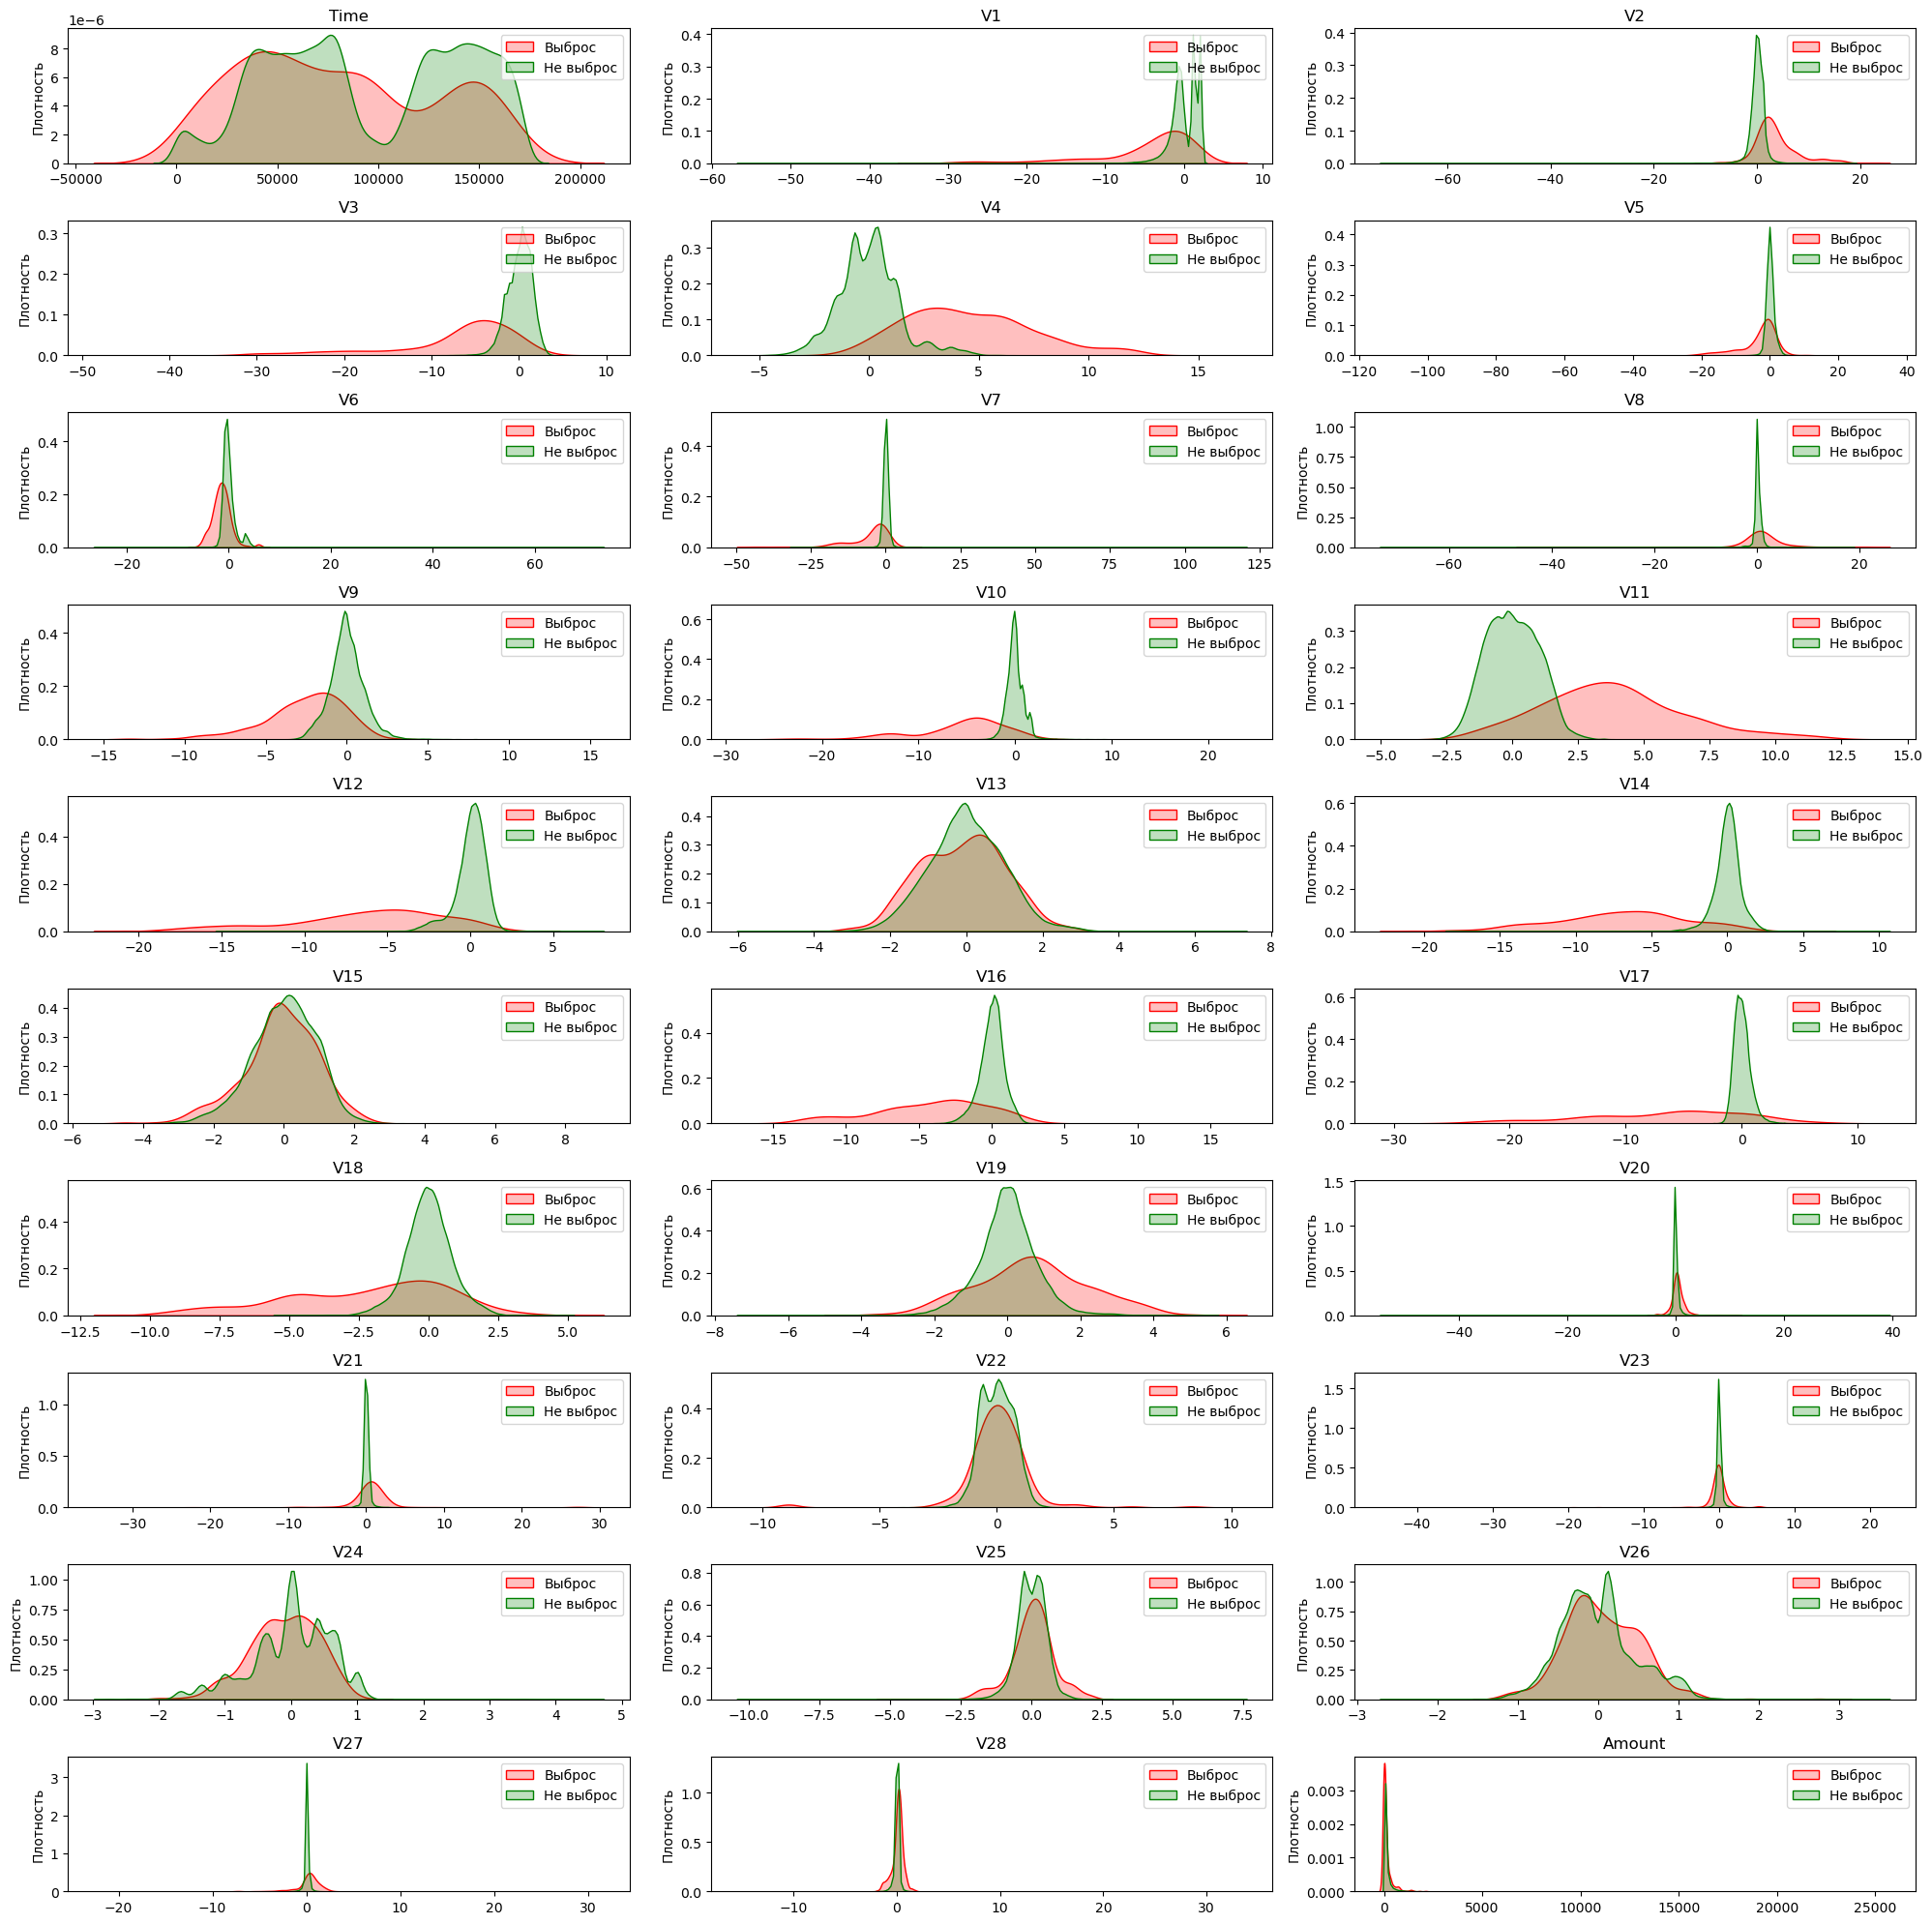

In [5]:
n_cols = 3  
n_rows = (len(features.columns) + n_cols - 1) // n_cols  

plt.figure(figsize=(20, 10*2))  

for n, col in enumerate(features.columns, 1):
    plt.subplot(n_rows, n_cols, n)  
    sns.kdeplot(data[data['Class'] == 1][col], color='r', label='–í—ã–±—Ä–æ—Å', fill=True)
    sns.kdeplot(data[data['Class'] == 0][col], color='g', label='–ù–µ –≤—ã–±—Ä–æ—Å', fill=True)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å')
    plt.legend()


plt.tight_layout()
plt.show()

–£–¥–∞–ª–∏–º –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ

In [6]:
features.drop(columns=["V13", "V15", "V22", "V24", "V25", "V26", "V28", "Amount"], inplace=True)
data.drop(columns=["V13", "V15", "V22", "V24", "V25", "V26", "V28", "Amount"], inplace=True)

**–í—ã—á–∏—Å–ª–∏–º —ç–∫—Å–ø–µ—Ä—Ç–Ω—É—é –æ—Ü–µ–Ω–∫—É –∑–∞–≥—Ä—è–∑–Ω–µ–Ω–Ω–æ—Å—Ç–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞**

In [7]:
expert_assessment = data.loc[data['Class'] == 1, :].shape[0] / data.shape[0]

print(data["Class"].value_counts())
print(f"–î–æ–ª—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å–∫–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π: {np.round(100 * expert_assessment,  3)}%")

0    284315
1       492
Name: Class, dtype: int64
–î–æ–ª—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å–∫–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π: 0.173%


<h2>–ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤ –¥–ª—è –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤</h2>

–ü–µ—Ä–µ–¥ –æ–±—É—á–µ–Ω–∏–µ–º –º–æ–¥–µ–ª–µ–π –ø—Ä–æ–∏–∑–≤–µ–¥–µ–º —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏—é –¥–∞–Ω–Ω—ã—Ö, –∞ –∏–º–µ–Ω–Ω–æ —Ä–æ–±–∞—Å—Ç–Ω–æ–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ, —Ç–∞–∫ –∫–∞–∫ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ —É—á–∏—Ç—ã–≤–∞—é—Ç—Å—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –º–µ–∂–¥—É –æ–±—ä–µ–∫—Ç–∞–º–∏

In [8]:
scaler = RobustScaler()
data_scaled = scaler.fit_transform(features)

*–†–µ–∞–ª–∏–∑—É–µ–º —Ñ—É–Ω–∫—Ü–∏–∏, –∫–æ—Ç–æ—Ä—ã–µ –±—É–¥–µ–º –ø—Ä–∏–º–µ–Ω—è—Ç—å –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è —Ä–∞–∑–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π*

In [9]:
def show_model_metrics(model_title: str, true: np.array, pred:  np.array): # —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏
    print(" "*30, f"–û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ {model_title}", end="\n\n")
    print(" "*20, "–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫")
    
    conf_matrix = confusion_matrix(true, pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap='Blues')
    plt.show()
    
    print("-"*60, end="\n\n")
    print(" "*3, f"–û—Ç—á–µ—Ç –ø–æ —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω—ã–º –º–µ—Ç—Ä–∏–∫–∞–º –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏")
    print(classification_report(true, pred))

In [10]:
def reduce_data(data, n_components=3): # —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è —Å–∂–∞—Ç–∏—è –¥–∞–Ω–Ω—ã—Ö
    data_pre_reduced = data_scaled.copy()

    umap_obj = UMAP(n_components=n_components, verbose=1, n_jobs=-1, random_state=42)

    start_time = time()
    print("–ù–∞—á–∏–Ω–∞–µ—Ç—Å—è —Ä–∞—Å—á–µ—Ç UMAP...")
    data_reduced = umap_obj.fit_transform(data_pre_reduced)
    end_time = time()
    print(f"–í—Ä–µ–º—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è: {end_time - start_time:.2f} —Å–µ–∫—É–Ω–¥")
    return data_reduced

In [11]:
def display_objects(data_reduced, true, pred):
    TP = (true == 1) & (pred == 1)  # –ú–æ–¥–µ–ª—å –≤–µ—Ä–Ω–æ –Ω–∞—à–ª–∞ –≤—ã–±—Ä–æ—Å
    FP = (true == 0) & (pred == 1)  # –ú–æ–¥–µ–ª—å –æ—à–∏–±–æ—á–Ω–æ –ø–æ–º–µ—Ç–∏–ª–∞ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ —Ç–æ—á–∫–∏ –∫–∞–∫ –≤—ã–±—Ä–æ—Å
    TN = (true == 0) & (pred == 0)  # –ú–æ–¥–µ–ª—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø–æ–º–µ—Ç–∏–ª–∞ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ —Ç–æ—á–∫–∏
    FN = (true == 1) & (pred == 0)  # –ú–æ–¥–µ–ª—å –ø—Ä–æ–ø—É—Å—Ç–∏–ª–∞ –≤—ã–±—Ä–æ—Å

    if data_reduced.shape[1] == 2:
        plt.figure(figsize=(12, 10))

        plt.scatter(data_reduced[TN, 0], data_reduced[TN, 1], color="gray", alpha=0.2, 
                    s=15, label="TN (True Negative)")
        plt.scatter(data_reduced[TP, 0], data_reduced[TP, 1], color="red", alpha=0.8, 
                    s=15, label="TP (True Positive)")
        plt.scatter(data_reduced[FP, 0], data_reduced[FP, 1], color="green", alpha=0.4,
                    s=15, label="FP (False Positive)")
        plt.scatter(data_reduced[FN, 0], data_reduced[FN, 1], color="blue", alpha=0.6, 
                     s=15, label="FN (False Negative)")

        plt.title("UMAP –ø—Ä–æ–µ–∫—Ü–∏—è (2D) - TP/FP/TN/FN")
        plt.xlabel("–ü–µ—Ä–≤–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞")
        plt.ylabel("–í—Ç–æ—Ä–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞")
        plt.legend()
        plt.show()
    
    elif data_reduced.shape[1] == 3:
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection="3d")

        ax.scatter(data_reduced[TN, 0], data_reduced[TN, 1], data_reduced[TN, 2], color="gray", s=15,
                   alpha=0.2, label="TN (True Negative)")
        ax.scatter(data_reduced[TP, 0], data_reduced[TP, 1], data_reduced[TP, 2], color="red", s=15, 
                   alpha=0.8, label="TP (True Positive)")
        ax.scatter(data_reduced[FP, 0], data_reduced[FP, 1], data_reduced[FP, 2], color="green", s=15, 
                   alpha=0.4, label="FP (False Positive)")
        ax.scatter(data_reduced[FN, 0], data_reduced[FN, 1], data_reduced[FN, 2], color="blue", s=15, 
                   alpha=0.6, label="FN (False Negative)")

        ax.set_title("UMAP –ø—Ä–æ–µ–∫—Ü–∏—è (3D) - TP/FP/TN/FN")
        ax.set_xlabel("–ü–µ—Ä–≤–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞")
        ax.set_ylabel("–í—Ç–æ—Ä–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞")
        ax.set_zlabel("–¢—Ä–µ—Ç—å—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞")
        plt.legend()
        plt.show()
    
    else:
        print("–¢–æ–ª—å–∫–æ 2D –∏ 3D –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞—é—Ç—Å—è.")

In [12]:
data_reduced = reduce_data(data_scaled, 2)

–ù–∞—á–∏–Ω–∞–µ—Ç—Å—è —Ä–∞—Å—á–µ—Ç UMAP...
UMAP(n_jobs=1, random_state=42, verbose=1)
Fri Jan 31 12:40:48 2025 Construct fuzzy simplicial set
Fri Jan 31 12:40:48 2025 Finding Nearest Neighbors
Fri Jan 31 12:40:48 2025 Building RP forest with 32 trees
Fri Jan 31 12:41:01 2025 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	 3  /  18
	Stopping threshold met -- exiting after 3 iterations
Fri Jan 31 12:41:32 2025 Finished Nearest Neighbor Search
Fri Jan 31 12:41:37 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Jan 31 12:53:59 2025 Finished embedding
–í—Ä–µ–º—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è: 791.96 —Å–µ–∫—É–Ω–¥


–û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –æ–±—ä–µ–∫—Ç–æ–≤, –ø–æ–º–µ—á–µ–Ω–Ω—ã—Ö –∫–∞–∫ **–∞–Ω–æ–º–∞–ª–∏–∏** —ç–∫—Å–ø–µ—Ä—Ç–∞–º–∏, –Ω–∞ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞—Ö, –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é UMAP

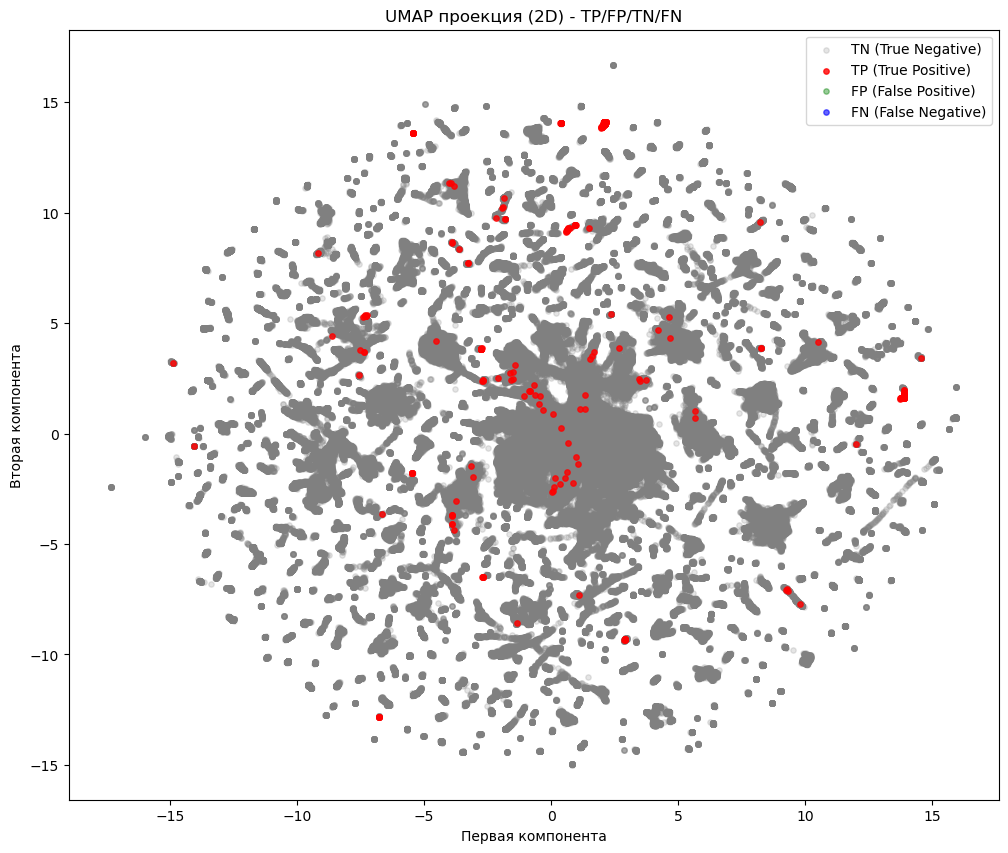

In [13]:
display_objects(data_reduced, data["Class"].values, data["Class"].values)

<h3>–°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –º–µ—Ç–æ–¥ –¥–ª—è –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏—è –∞–Ω–æ–º–∞–ª—å–Ω—ã—Ö –æ–±—ä–µ–∫—Ç–æ–≤</h3>

–ú–µ—Ç–æ–¥ **IQR-based Outlier** –∏—Å–ø–æ–ª—å–∑—É–µ—Ç **–º–µ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω—ã–π —Ä–∞–∑–º–∞—Ö (IQR)** –¥–ª—è –≤—ã—è–≤–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö. –°–Ω–∞—á–∞–ª–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —á–∏—Å–ª–æ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞—é—Ç—Å—è **–≥—Ä–∞–Ω–∏—Ü—ã –Ω–∞ –æ—Å–Ω–æ–≤–µ –∫–≤–∞—Ä—Ç–∏–ª–µ–π –∏ –º–µ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω–æ–≥–æ —Ä–∞–∑–º–∞—Ö–∞**, –∏ –æ–±—ä–µ–∫—Ç—ã, –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ—Ç–æ—Ä—ã—Ö –≤—ã—Ö–æ–¥—è—Ç –∑–∞ —ç—Ç–∏ –≥—Ä–∞–Ω–∏—Ü—ã, –ø–æ–º–µ—á–∞—é—Ç—Å—è –∫–∞–∫ –≤—ã–±—Ä–æ—Å—ã **–≤ —Ä–∞–º–∫–∞—Ö –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞**. –ó–∞—Ç–µ–º –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞ —Å—É–º–º–∏—Ä—É–µ—Ç—Å—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –ø–æ –∫–æ—Ç–æ—Ä—ã–º –æ–Ω –±—ã–ª –æ—Ç–º–µ—á–µ–Ω –∫–∞–∫ –≤—ã–±—Ä–æ—Å, –∏ –µ—Å–ª–∏ —ç—Ç–æ —á–∏—Å–ª–æ **–ø—Ä–µ–≤—ã—à–∞–µ—Ç –∑–∞–¥–∞–Ω–Ω—ã–π –ø–æ—Ä–æ–≥**, –æ–±—ä–µ–∫—Ç –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É–µ—Ç—Å—è –∫–∞–∫ –∞–Ω–æ–º–∞–ª—å–Ω—ã–π.

In [14]:
def outliers_bound(sample, k=1.5):
    q1, q3 = np.percentile(sample, 25), np.percentile(sample, 75)
    iqr = q3 - q1

    return q1 - k * iqr, q3 + k * iqr

In [15]:
outliers_by_features = features.copy()
for column in outliers_by_features.columns:
    lower_bound, upper_bound = outliers_bound(outliers_by_features[column])
    outliers_by_features[column] = outliers_by_features[column].\
    apply(lambda x: 1 if x < lower_bound or x > upper_bound else 0)

In [16]:
threshold = 13

outliers_by_features["IQR-based Outlier"] = outliers_by_features.\
apply(lambda x: 1 if sum(x) > threshold else 0, axis=1)

print(f"–î–æ–ª—è –≤—ã–±—Ä–æ—Å–æ–≤, –æ–±–Ω–∞—Ä—É–∂–µ–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è –∞–Ω–æ–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Å –∑–∞–¥–∞–Ω–Ω—ã–º –ø–æ—Ä–æ–≥–æ–º:", end=" ")
print(f"{100 * sum(outliers_by_features['IQR-based Outlier']) / len(outliers_by_features):.3f}%")

–î–æ–ª—è –≤—ã–±—Ä–æ—Å–æ–≤, –æ–±–Ω–∞—Ä—É–∂–µ–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è –∞–Ω–æ–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Å –∑–∞–¥–∞–Ω–Ω—ã–º –ø–æ—Ä–æ–≥–æ–º: 0.183%


                               –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ IQR-based Outlier

                     –ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫


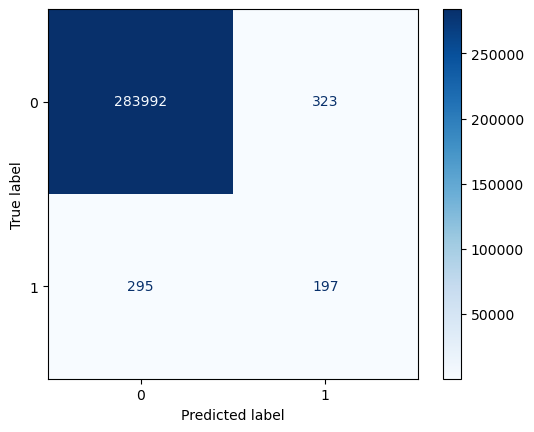

------------------------------------------------------------

    –û—Ç—á–µ—Ç –ø–æ —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω—ã–º –º–µ—Ç—Ä–∏–∫–∞–º –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.38      0.40      0.39       492

    accuracy                           1.00    284807
   macro avg       0.69      0.70      0.69    284807
weighted avg       1.00      1.00      1.00    284807



In [17]:
show_model_metrics("IQR-based Outlier", data["Class"], outliers_by_features["IQR-based Outlier"])

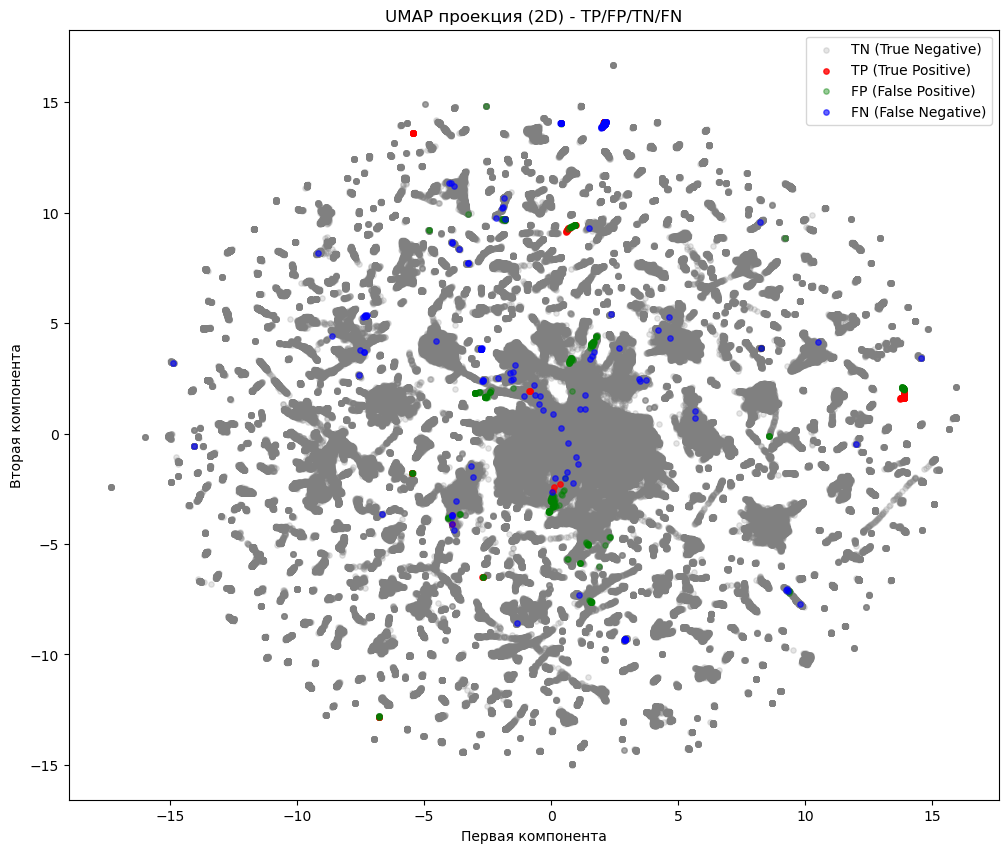

In [18]:
display_objects(data_reduced, data["Class"].values, outliers_by_features["IQR-based Outlier"].values)

<h3>OneClass SVM</h3>

<h4>–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏</h4>

In [19]:
one_class_svm = OneClassSVM(nu=expert_assessment, gamma="auto", verbose=1)
one_class_svm.fit(data_scaled)
labels = one_class_svm.predict(data_scaled)

data["OneClassSVM pred"] = np.where(labels == -1, 1, 0)

print(f"–î–æ–ª—è –≤—ã–±—Ä–æ—Å–æ–≤ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç {100 * data['OneClassSVM pred'].sum() / data.shape[0]:.3f}%")

[LibSVM]–î–æ–ª—è –≤—ã–±—Ä–æ—Å–æ–≤ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 0.889%


<h4>–û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞</h4>

                               –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ OneClass SVM

                     –ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫


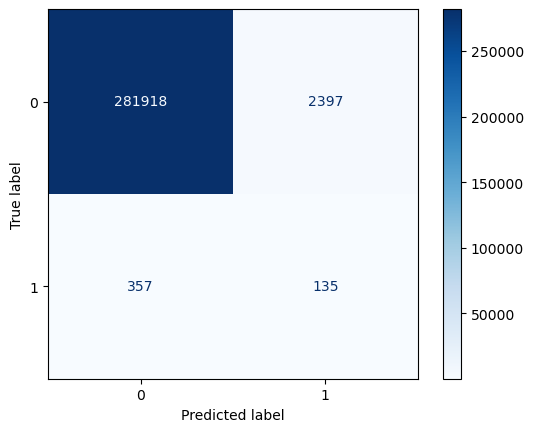

------------------------------------------------------------

    –û—Ç—á–µ—Ç –ø–æ —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω—ã–º –º–µ—Ç—Ä–∏–∫–∞–º –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.05      0.27      0.09       492

    accuracy                           0.99    284807
   macro avg       0.53      0.63      0.54    284807
weighted avg       1.00      0.99      0.99    284807



In [20]:
show_model_metrics("OneClass SVM", data["Class"], data["OneClassSVM pred"])

<h4>–û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∞–Ω–æ–º–∞–ª–∏–π –Ω–∞ —Å–∂–∞—Ç–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ</h4>

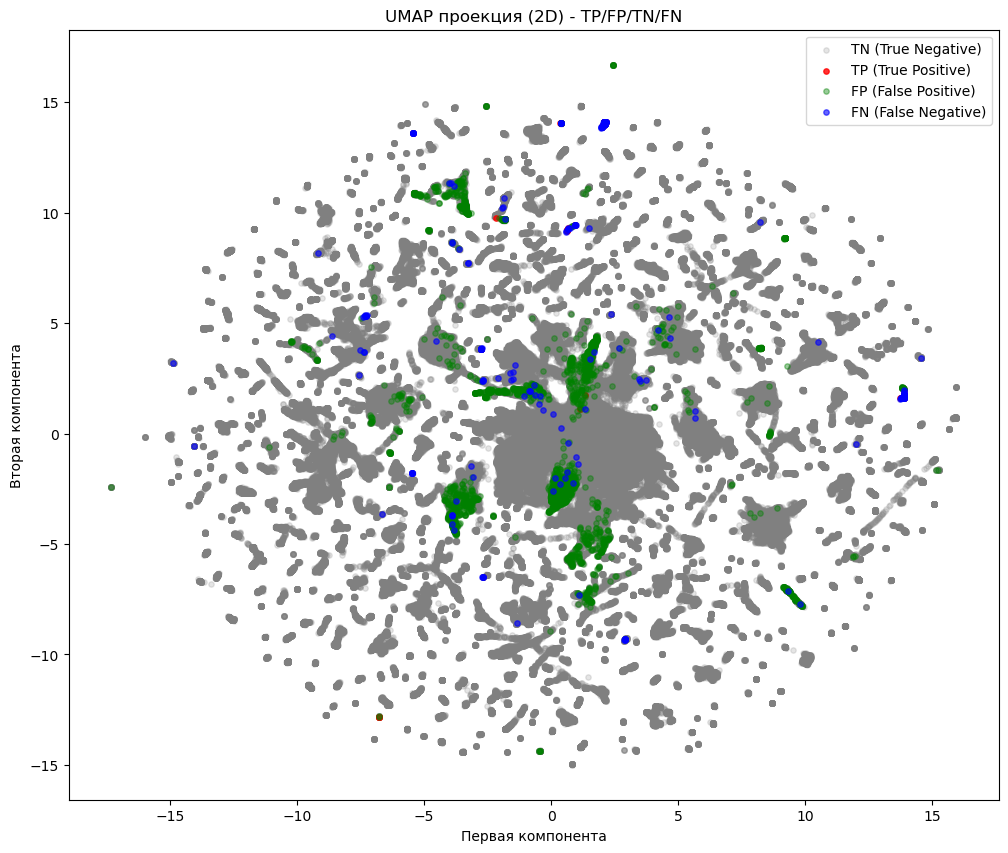

In [21]:
display_objects(data_reduced, data["Class"].values, data["OneClassSVM pred"].values)

<h3>IsolationForest</h3>

<h4>–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏</h4>

In [22]:
iso = IsolationForest(n_estimators=500, max_samples=1000, max_features=data.shape[1] // 3, 
                      contamination=expert_assessment, bootstrap=True, n_jobs=-1)
iso.fit(data_scaled)
labels = iso.predict(data_scaled)

data["IsolationForest pred"] = np.where(labels == -1, 1, 0)

print(f"–î–æ–ª—è –≤—ã–±—Ä–æ—Å–æ–≤ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç {100 * data['IsolationForest pred'].sum() / data.shape[0]:.3f}%")

–î–æ–ª—è –≤—ã–±—Ä–æ—Å–æ–≤ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 0.173%


<h4>–û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞</h4>

                               –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ IsolationForest

                     –ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫


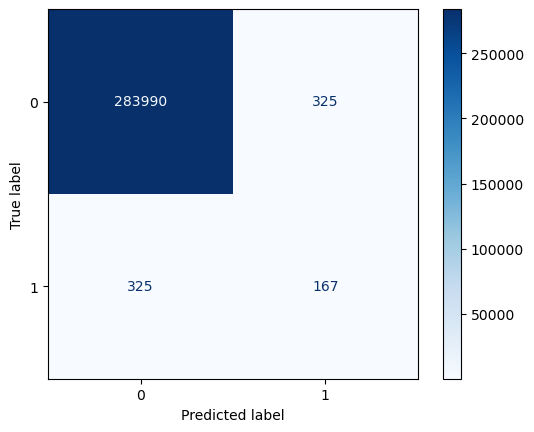

------------------------------------------------------------

    –û—Ç—á–µ—Ç –ø–æ —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω—ã–º –º–µ—Ç—Ä–∏–∫–∞–º –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.34      0.34       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807



In [23]:
show_model_metrics("IsolationForest", data["Class"], data["IsolationForest pred"])

<h4>–û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∞–Ω–æ–º–∞–ª–∏–π –Ω–∞ —Å–∂–∞—Ç–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ</h4>

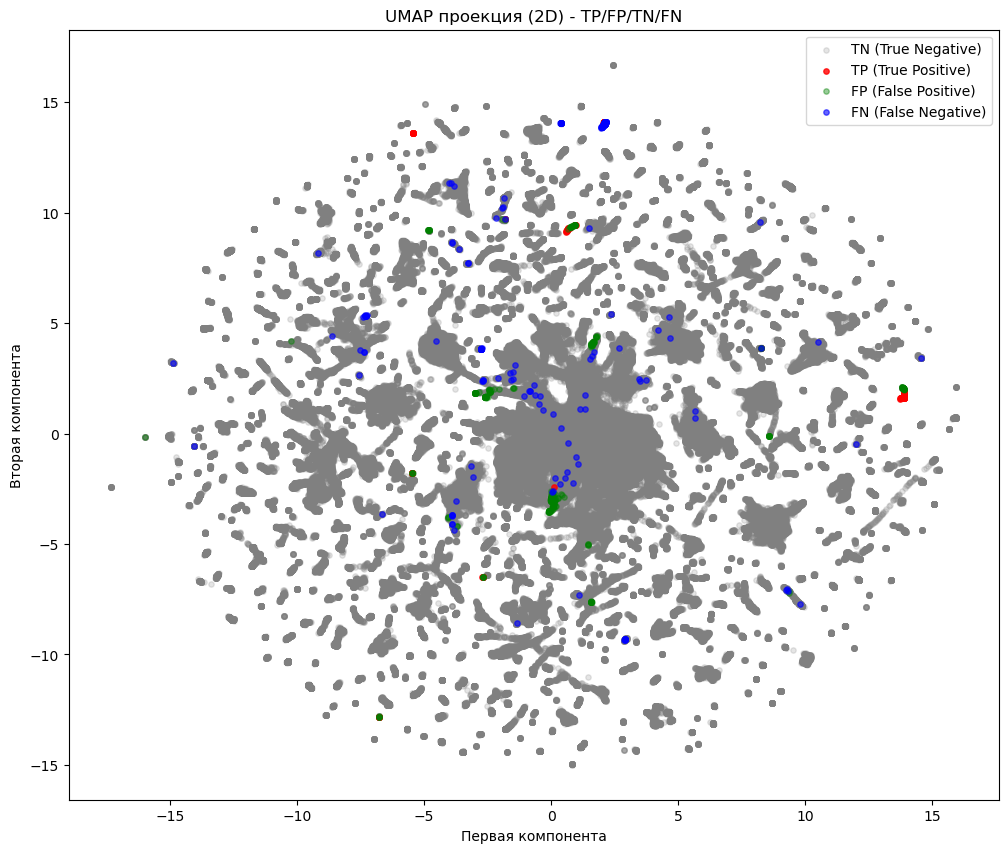

In [24]:
display_objects(data_reduced, data["Class"].values, data["IsolationForest pred"].values)

<h3>üîç–û–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω—ã–π –≤—ã–≤–æ–¥ –ø–æ –ø–æ–∏—Å–∫—É –∞–Ω–æ–º–∞–ª–∏–π</h3>

<p>–í —Ö–æ–¥–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ –ø—Ä–æ–≤–æ–¥–∏–ª—Å—è –ø–æ–∏—Å–∫ –∞–Ω–æ–º–∞–ª–∏–π –Ω–∞ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–Ω—ã—Ö –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—è—Ö –¥–∞–Ω–Ω—ã—Ö. –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏—Å—å <b>IsolationForest, One-Class SVM</b> –∏ –º–µ—Ç–æ–¥ —á–∞—Å—Ç—ã—Ö –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–π –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è—Ö –ø–æ –∫–∞–∂–¥–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É.
</p>
<p>–û—Å–Ω–æ–≤–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:</p>
<ul>
    <li>–°–æ–≥–ª–∞—Å–Ω–æ <b>—ç–∫—Å–ø–µ—Ä—Ç–Ω–æ–π –æ—Ü–µ–Ω–∫–µ</b>, –∞–Ω–æ–º–∞–ª–∏–π –≤ –¥–∞–Ω–Ω—ã—Ö <b>–º–µ–Ω–µ–µ 1%</b>, —á—Ç–æ –¥–µ–ª–∞–µ—Ç –∏—Ö –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ —Å–ª–æ–∂–Ω–æ–π –∑–∞–¥–∞—á–µ–π.</li>
    <li><b>–ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–µ –º–µ—Ç–æ–¥—ã</b> (IsolationForest, SVM) –ø–æ–∫–∞–∑–∞–ª–∏ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω—É—é —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å, –Ω–∞—Ö–æ–¥—è –ª–∏—à—å <b>‚âà35% –∞–Ω–æ–º–∞–ª–∏–π</b> (recall), —á—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ –≤ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–Ω–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ.</li>
    <li>–ú–µ—Ç–æ–¥ —á–∞—Å—Ç—ã—Ö –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–π –ø–æ–∫–∞–∑–∞–ª –∞–Ω–∞–ª–æ–≥–∏—á–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç —Å–ª–æ–∂–Ω–æ—Å—Ç—å –≤—ã—è–≤–ª–µ–Ω–∏—è –∞–Ω–æ–º–∞–ª–∏–π –≤ –¥–∞–Ω–Ω—ã—Ö.</li>
</ul>
<p>–ú–µ—Ç–æ–¥—ã –ø–æ–∏—Å–∫–∞ –∞–Ω–æ–º–∞–ª–∏–π –Ω–µ –¥–∞–ª–∏ —Ç–æ—á–Ω–æ–≥–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ –∏–∑-–∑–∞ –Ω–∏–∑–∫–æ–π –¥–æ–ª–∏ –∞–Ω–æ–º–∞–ª–∏–π (–º–µ–Ω–µ–µ 1%) –∏ —Å–ª–∞–±–æ–≥–æ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤ –≤ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞—Ö. –î–ª—è —É–ª—É—á—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –¥–µ—Ç–µ–∫—Ü–∏–∏ —Å—Ç–æ–∏—Ç –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å <b>–≥–ª—É–±–∂–µ –∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–µ–π—Ä–æ–Ω–Ω—ã–µ —Å–µ—Ç–∏ –∏–ª–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥.</b></p>